Index(['Humidité (%)', 'Température (°C)', 'pH du sol', 'Précipitations (mm)',
       'Type de sol', 'Rendement agricole (t/ha)'],
      dtype='object')
<bound method NDFrame.head of      Humidité (%)  Température (°C)  pH du sol  Précipitations (mm)  \
0       52.472407         27.454043   6.055399           179.770446   
1       87.042858         23.402409   7.125703           169.795469   
2       73.919637         17.738190   8.118838            56.410516   
3       65.919509         30.344875   7.696675           135.311957   
4       39.361118         27.118279   7.919683           145.048905   
..            ...               ...        ...                  ...   
495     51.201134         12.289552   7.504638           214.238789   
496     65.019367         32.932839   7.358471           289.153655   
497     34.664078         13.420466   6.890482            67.239504   
498     88.463688         33.755934   6.639357            64.263680   
499     89.172645         21.150144 

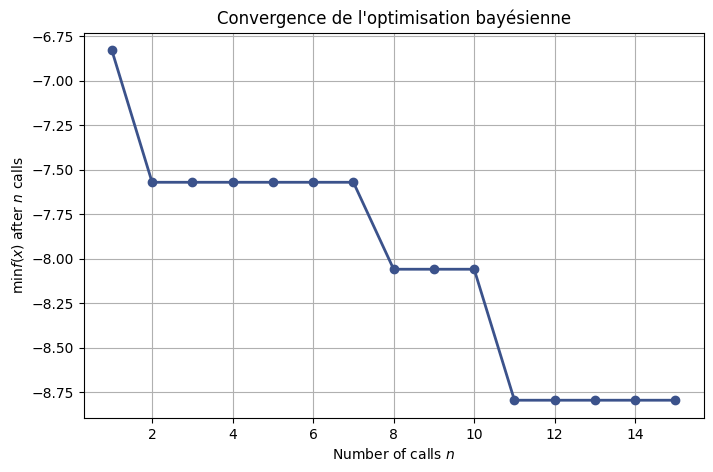

Meilleur rendement trouvé : 8.793797181958023
Paramètres optimaux (humidité, température) : [89.57788776715802, 34.992941832153264]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from skopt import gp_minimize
from skopt.plots import plot_convergence
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor,GaussianProcessClassifier
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process.kernels import RBF, Matern, DotProduct,WhiteKernel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint




# Chargement des données
data = pd.read_csv(r'C:\Users\me\Desktop\M1SDTS\ATDN\ATDN2\TP3\tp2_atdn_donnees.csv')
X = data[['Humidité (%)', 'Température (°C)']].values
y_rendement = data['Rendement agricole (t/ha)']
y_sol = data['Type de sol']
print(data.columns)
print(data.head)

# Séparation des données en train/test
X_train, X_test, y_train_rendement, y_test_rendement = train_test_split(X, y_rendement, test_size=0.2, random_state=42)
X_train_sol, X_test_sol, y_train_sol, y_test_sol = train_test_split(X, y_sol, test_size=0.2, random_state=42)


#Partie 1 : Optimisation Bayésienne
gpr= LinearRegression()
gpr.fit(X,y_rendement)

#3 optimisation bayésienne pour maximiser la production agricole en  fonction de l'humidité et de la température.
# Fonction de rendement agricole simulée
def rendement_agricole(X):
    humidite, temperature = X
    prediction=gpr.predict([[humidite,temperature]])
    return  -prediction[0]


# Définition de l’espace de recherche
espace = [
    Real(data['Humidité (%)'].min(), data['Humidité (%)'].max(), name='humidite'),
    Real(data['Température (°C)'].min(), data['Température (°C)'].max(), name='temperature')
]
# Optimisation bayésienne
result = gp_minimize(rendement_agricole, espace, n_calls=15, random_state=42)

# Affichage des résultats
plt.figure(figsize=(8,5))
plot_convergence(result)
plt.title("Convergence de l'optimisation bayésienne")
plt.show()

print("Meilleur rendement trouvé :", -result.fun)# on met "- result" pour faire inverser la minimisation et avoir la maximisation 
print("Paramètres optimaux (humidité, température) :", result.x)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


c:\Users\me\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(3), np.int64(10)] before, using random point [np.int64(14), np.int64(162)]
  warnings.warn(


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

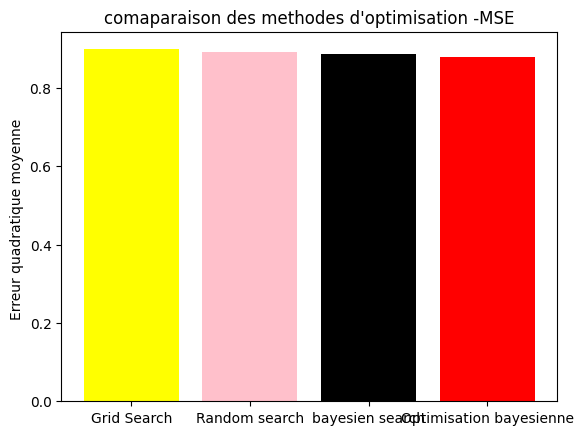

In [14]:
from skopt.space import Integer
from skopt import gp_minimize
from skopt.searchcv import BayesSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 5 optimisation bayésienne pour ajuster les hyperparamètres d’un modèle de régression
# Définition de l’espace de recherche pour BayesSearchCV (Dictionnaire)
param_space = {
    'n_estimators': Integer(10, 200),
    'max_depth': Integer(3, 30)
}

# Définition des espaces d'hyperparamètres pour Grid Search et Random Search
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [3, 5, 10, 20]
    
}

param_dist = {
    'n_estimators':randint(10, 200),
    'max_depth': randint(1,20)
    
}

# Définir l’espace de recherche pour gp_minimize 
param_space_gp = [Integer(10, 200), Integer(3, 30)]

# Fonction objectif(avec random forest ) pour gp_minimize
def rf_objectif(params):
    n_estimators, max_depth = params
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train_rendement)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test_rendement, y_pred)  # Minimisation de l'erreur

# Optimisation bayésienne avec gp_minimize
res_rf = gp_minimize(rf_objectif, param_space_gp, n_calls=30, random_state=42)

# Meilleurs hyperparamètres
baye_best_para = {'n_estimators': res_rf.x[0], 'max_depth': res_rf.x[1]}

# Modèle Random Forest avec les meilleurs paramètres
rf = RandomForestRegressor(n_estimators=baye_best_para['n_estimators'],
                           max_depth=baye_best_para['max_depth'],
                           random_state=42)

# Optimisation bayésienne avec BayesSearchCV
opt = BayesSearchCV(rf, param_space, n_iter=50, cv=3, n_jobs=-1, verbose=2)

# Entraînement
opt.fit(X_train, y_train_rendement)

# Résultats des meilleurs hyperparametres avec random forest 
print("Meilleurs hyperparamètres pour le Random Forest : ", opt.best_params_)
y_pred = opt.predict(X_test)
mse_bayes = mean_squared_error(y_test_rendement, y_pred)





# l'erreur quadratique moyenne (MSE) pour le meilleur modèle trouvé
best_model = RandomForestRegressor(n_estimators=res_rf.x[0], max_depth=res_rf.x[1], random_state=42)
best_model.fit(X_train, y_train_rendement)
y_pred = best_model.predict(X_test)
best_mse = mean_squared_error(y_test_rendement, y_pred)



# Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train_rendement)
grid_search_best_mse = mean_squared_error(y_test_rendement, grid_search.predict(X_test))

# Random Search
random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error',random_state=42)
random_search.fit(X_train, y_train_rendement)
random_search_best_mse = mean_squared_error(y_test_rendement, random_search.predict(X_test))

# Affichage des résultats
print(f"Grid Search MSE : {grid_search_best_mse}")
print(f"Random Search MSE : {random_search_best_mse}")
print(f"Bayesian search : {mse_bayes}")
print(f" MSE pour le modèle optimisé : {best_mse}")


method=['Grid Search','Random search','bayesien search','Optimisation bayesienne']

mse_valeur=[grid_search_best_mse,random_search_best_mse,mse_bayes,best_mse]

plt.bar(method,mse_valeur,color=['yellow','pink','black','red'])

plt.title("comaparaison des methodes d'optimisation -MSE")
plt.ylabel("Erreur quadratique moyenne ")
plt.show()






Erreur quadratique moyenne (MSE) pour le modèle optimisé : 0.8784357976088389


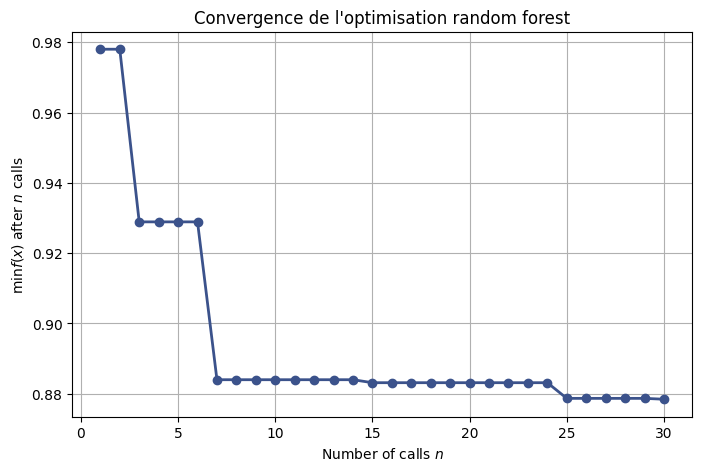

In [5]:
from skopt.space import Integer
from skopt import gp_minimize
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from skopt.plots import plot_convergence

# Définir l'espace de recherche pour les hyperparamètres
param_space = [
    Integer(10, 200, name='n_estimators'),  # Nombre d'arbres dans la forêt
    Integer(3, 30, name='max_depth')        # Profondeur maximale des arbres
]



# Affichage de l'erreur quadratique moyenne (MSE) pour le meilleur modèle trouvé
best_model = RandomForestRegressor(n_estimators=res_rf.x[0], max_depth=res_rf.x[1], random_state=42)
best_model.fit(X_train, y_train_rendement)
y_pred = best_model.predict(X_test)
best_mse = mean_squared_error(y_test_rendement, y_pred)
print(f"Erreur quadratique moyenne (MSE) pour le modèle optimisé : {best_mse}")


# Affichage de la courbe de convergence
plt.figure(figsize=(8, 5))
plot_convergence(res_rf)
plt.title("Convergence de l'optimisation random forest")
plt.show()


c:\Users\me\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


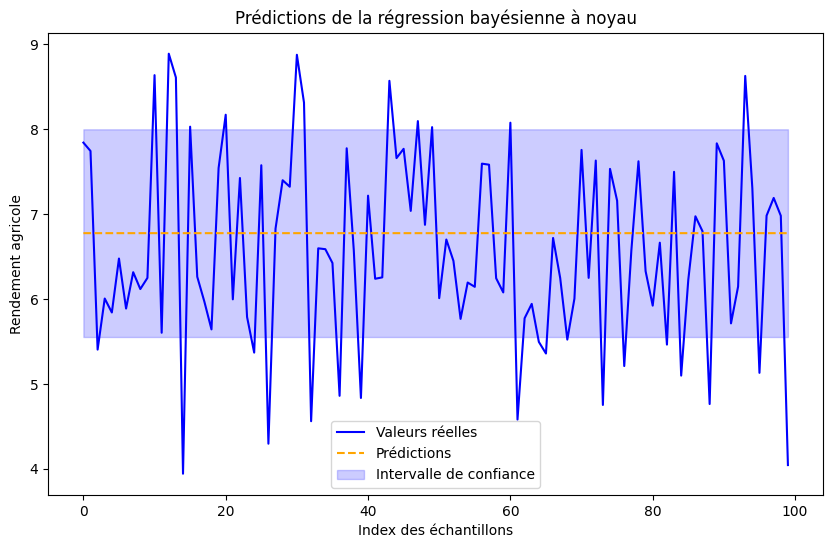

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# Définir le noyau : RBF + WhiteKernel (bruit)
kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0)

# Créer le modèle de régression bayésienne à noyau
gpr = GaussianProcessRegressor(kernel=kernel, random_state=42)

# Entraîner le modèle
gpr.fit(X_train, y_train_rendement)

# Prédictions
y_pred, sigma = gpr.predict(X_test, return_std=True)

# Visualisation des prédictions et des intervalles de confiance
plt.figure(figsize=(10,6))
plt.plot(range(len(y_test_rendement)), y_test_rendement, label="Valeurs réelles", linestyle='solid', color='blue')
plt.plot(range(len(y_pred)), y_pred, label="Prédictions", linestyle='dashed', color='orange')
plt.fill_between(range(len(y_pred)), y_pred - sigma, y_pred + sigma, alpha=0.2, color='blue', label="Intervalle de confiance")
plt.legend()
plt.xlabel("Index des échantillons")
plt.ylabel("Rendement agricole")
plt.title("Prédictions de la régression bayésienne à noyau")
plt.show()





In [16]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Définir le noyau
kernel = RBF(length_scale=1.0)

# Créer le modèle de classification bayésienne
gpc = GaussianProcessClassifier(kernel=kernel,random_state=42)

# Entraîner le modèle
gpc.fit(X_train_sol, y_train_sol)

# Prédictions
y_pred_sol = gpc.predict(X_test_sol)

# Calcul de la précision
accuracy = accuracy_score(y_test_sol, y_pred_sol)
print(f"Précision du modèle bayésien à noyau pour la classification : {accuracy}")



# 2. Comparaison avec un SVM classique
# Entraîner un SVM avec un noyau linéaire
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_sol, y_train_sol)

# Prédictions
svm_linear_pred = svm_linear.predict(X_test_sol)

# Calcul de la précision
svm_linear_accuracy = accuracy_score(y_test_sol, svm_linear_pred)
print(f"Précision du SVM classique (noyau linéaire) : {svm_linear_accuracy}")



Précision du modèle bayésien à noyau pour la classification : 0.31
Précision du SVM classique (noyau linéaire) : 0.31


Précision du SVM avec noyau linear: 0.31
Précision du SVM avec noyau rbf: 0.31
Précision du SVM avec noyau poly: 0.31


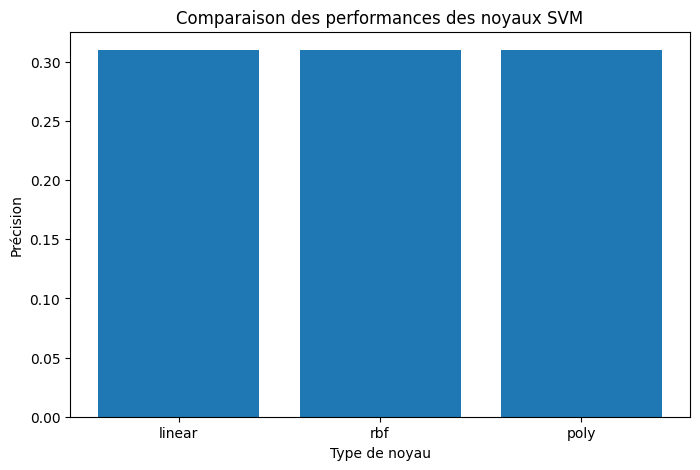

In [ ]:
#13

# Définir les noyaux à tester
kernels = ['linear', 'rbf', 'poly']
accuracies = []
# Tester chaque noyau
for kernel in kernels:
    # Initialiser le modèle SVM avec le noyau spécifié
    svm = SVC(kernel=kernel)
    
    # Entraîner le modèle
    svm.fit(X_train_sol, y_train_sol)
    
    # Prédire les classes
    y_pred_sol = svm.predict(X_test_sol)
    
    # Calculer la précision
    accuracy = accuracy_score(y_test_sol, y_pred_sol)
    accuracies.append(accuracy)
    
    # Afficher les résultats
    print(f"Précision du SVM avec noyau {kernel}: {accuracy}")

# Visualiser les résultats
plt.figure(figsize=(8,5))
plt.bar(kernels, accuracies)
plt.title('Comparaison des performances des noyaux SVM')
plt.xlabel('Type de noyau')
plt.ylabel('Précision')
plt.show()


Test avec noyau : RBF


Précision : 0.3100

Test avec noyau : Linéaire
Précision : 0.3000

Test avec noyau : Rational Quadratic


c:\Users\me\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__alpha is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Précision : 0.3100


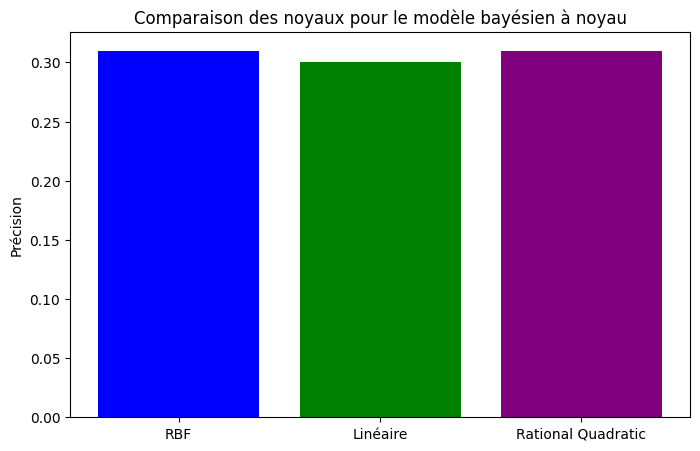

In [19]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct, RationalQuadratic
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Définition des différents noyaux disponibles
kernels = {
    "RBF": RBF(length_scale=1.0),
    "Linéaire": DotProduct(),
    "Rational Quadratic": RationalQuadratic(length_scale=1.0, alpha=1.0) + WhiteKernel(noise_level=0.1)
}



# Stockage des résultats
results = {}

for name, kernel in kernels.items():
    print(f"\nTest avec noyau : {name}")
    
    # Création du modèle bayésien avec le noyau testé
    gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)
    
    # Entraînement du modèle
    gpc.fit(X_train_sol, y_train_sol)
    
    # Prédictions
    y_pred_sol = gpc.predict(X_test_sol)
    
    # Précision du modèle
    accuracy = accuracy_score(y_test_sol, y_pred_sol)
    results[name] = accuracy
    print(f"Précision : {accuracy:.4f}")

# Affichage des résultats sous forme de barres
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'purple'])
plt.ylabel("Précision")
plt.title("Comparaison des noyaux pour le modèle bayésien à noyau")
plt.show()
